In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import requests

## Project Luther
Using the CIA World Fact Book (open data source)
Can the %renewable energy be predicted given 
1.) population
2.) gpd
3.) industrialized growth
4.) internet users
5.) unemployment rate
6.) income distribution
7.) total energy consumption
8.) energy from fossil fuels
9.) energy from nuclear
10.) energy from hydroelectric

using multivariate linear regression.

This data set contains 227 countries (22.7 data points per feature)

In [2]:
def web_scrape_cia(url):
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,'html5lib')
    right_table=soup.find('table')
    #print(right_table)

    cols = []
    cols = [element.text for element in soup.find_all('th')]

    entries = []
    for entry in right_table.find_all('tr')[1:]:
        desired_info = [e.text for e in entry.find_all('td')]
        entries.append(desired_info)

    return pd.DataFrame(entries,columns=cols)
    

In [3]:
# population per country
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2119rank.html'
tpop = web_scrape_cia(url)

In [4]:
tpop.head()

,Rank,Country,POPULATION,Date of Information
0,1,China,"1,379,302,771",July 2017 est.
1,2,India,"1,281,935,911",July 2017 est.
2,3,United States,"326,625,791",July 2017 est.
3,4,Indonesia,"260,580,739",July 2017 est.
4,5,Brazil,"207,353,391",July 2017 est.


In [6]:
# electricity consumption per country
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2233rank.html'
nrg = web_scrape_cia(url)

In [7]:
nrg.head()

,Rank,Country,(KWH),Date of Information
0,1,China,"5,920,000,000,000",2016 est.
1,2,United States,"3,911,000,000,000",2015 est.
2,3,European Union,"2,771,000,000,000",2015 est.
3,4,India,"1,048,000,000,000",2015 est.
4,5,Japan,"933,600,000,000",2015 est.


In [8]:
# internet users per country
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2153rank.html'
usr = web_scrape_cia(url)

In [9]:
# industrial growth rate
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2089rank.html'
igr = web_scrape_cia(url)

In [10]:
igr.head()

,Rank,Country,(%),Date of Information
0,1,Libya,76.50,2017 est.
1,2,Kyrgyzstan,17.30,2017 est.
2,3,Sierra Leone,15.50,2017 est.
3,4,Maldives,14.00,2012 est.
4,5,Yemen,13.70,2017 est.


In [11]:
# Population growth rate
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2002rank.html'
pgr = web_scrape_cia(url)

In [12]:
pgr.head()

,Rank,Country,(%),Date of Information
0,1,South Sudan,3.83,2017 est.
1,2,Angola,3.52,2017 est.
2,3,Malawi,3.31,2017 est.
3,4,Burundi,3.25,2017 est.
4,5,Uganda,3.20,2017 est.


In [13]:
# Distributed income (GINI index)
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2172rank.html'
gini = web_scrape_cia(url)

In [14]:
gini.head()

,Rank,Country,DISTRIBUTION OF FAMILY INCOME - GINI INDEX,Date of Information
0,1,Lesotho,63.2,1995 est.
1,2,South Africa,62.5,2013 est.
2,3,"Micronesia, Federated States of",61.1,2013 est.
3,4,Haiti,60.8,2012 est.
4,5,Botswana,60.5,2009 est.


In [15]:
# Unemployment rate
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2129rank.html'
uer = web_scrape_cia(url)

In [16]:
uer.tail()

,Rank,Country,(%),Date of Information
213,214,Senegal,48.00,2007 est.
214,215,Syria,50.00,2017 est.
215,216,Djibouti,60.00,2017 est.
216,217,Burkina Faso,77.00,2004 est.
217,218,Zimbabwe,95.00,2014 est.


In [17]:
#energy from fossil fuels
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2237rank.html'
eff = web_scrape_cia(url)

In [18]:
eff.head()

,Rank,Country,(% OF TOTAL INSTALLED CAPACITY),Date of Information
0,1,British Virgin Islands,658.3,2015 est.
1,2,Western Sahara,100.0,2015 est.
2,3,Chad,100.0,2015 est.
3,4,Cayman Islands,100.0,2015 est.
4,5,Djibouti,100.0,2015 est.


In [19]:
#energy from nuclear fuels
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2239rank.html'
enf = web_scrape_cia(url)

In [20]:
enf.head()

,Rank,Country,(% OF TOTAL INSTALLED CAPACITY),Date of Information
0,1,France,48.8,2015 est.
1,2,Slovenia,34.4,2016 est.
2,3,Belgium,28.0,2015 est.
3,4,Slovakia,25.5,2015 est.
4,5,Sweden,24.3,2015 est.


In [21]:
#energy from hydrolyic plants
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2238rank.html'
ehp = web_scrape_cia(url)

In [22]:
ehp.head()

,Rank,Country,(% OF TOTAL INSTALLED CAPACITY),Date of Information
0,1,Lesotho,100.0,2015 est.
1,2,Paraguay,99.3,2015 est.
2,3,Bhutan,99.0,2016 est.
3,4,"Congo, Democratic Republic of the",98.7,2015 est.
4,5,Laos,98.2,2015 est.


In [32]:
#energy from other renewables
url = 'https://www.cia.gov/library/publications/the-world-factbook/rankorder/2240rank.html'
eor = web_scrape_cia(url)

In [33]:
eor.head()

,Rank,Country,(% OF TOTAL INSTALLED CAPACITY),Date of Information
0,1,Kenya,53.6,2015 est.
1,2,Denmark,53.6,2015 est.
2,3,Germany,49.9,2015 est.
3,4,Swaziland,43.1,2015 est.
4,5,Uruguay,39.0,2015 est.


## Linear Regression
Now let's attempt to create linear regression model, first by visualizing the correlations

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

sns.set_style("darkgrid")
%matplotlib inline


In [75]:
#sm.OLS(y,sm.add_constant(X)).fit().summary()

In [115]:
#New df with the 10 features selected
# tpop, gpd, nrg,enf, ehp, eor

sources = [tpop,nrg,usr,igr,pgr,gini,eff,enf,ehp,eor]
def comma_2_float(source):
    try:
        source.iloc[:,2].asfloat()
    except:
        temp = source.iloc[:,2]
        cols = [float(''.join(x.split(','))) for x in temp]   
    return cols

source_cols = [comma_2_float(source) for source in sources]

#print(source_cols)



foo = pd.DataFrame(source_cols)
df = foo.transpose()
titles = ['Total_Populations','Energy_Consumption','Internet_Users', 
 'Industrial_Growth_Rate', 'Population_Growth_Rate','Income_Distribution',
 'Energy_from_Fossil_Fuels','Energy_Nuclear_Fuels','Energy_Hydroelectric',
 'Energy_Other_Renewable']
df.columns = titles
df['all_renewable'] = df['Energy_Hydroelectric'] + df['Energy_Other_Renewable'] 
df.drop('Energy_Other_Renewable',1)
df.drop('Energy_Hydroelectric',1)
#foo.head()
#heatmap

#sources
df.head()

,Total_Populations,Energy_Consumption,Internet_Users,Industrial_Growth_Rate,Population_Growth_Rate,Income_Distribution,Energy_from_Fossil_Fuels,Energy_Nuclear_Fuels,Energy_Hydroelectric,Energy_Other_Renewable,all_renewable
0,1.379303e+09,5.920000e+12,730723960.0,76.5,3.83,63.2,658.3,48.8,100.0,53.6,153.6
1,1.281936e+09,3.911000e+12,398100000.0,17.3,3.52,62.5,100.0,34.4,99.3,53.6,152.9
2,3.266258e+08,2.771000e+12,374328160.0,15.5,3.31,61.1,100.0,28.0,99.0,49.9,148.9
3,2.605807e+08,1.048000e+12,246809221.0,14.0,3.25,60.8,100.0,25.5,98.7,43.1,141.8
4,2.073534e+08,9.336000e+11,122841218.0,13.7,3.20,60.5,100.0,24.3,98.2,39.0,137.2


In [116]:
#sns.pairplot(foo);


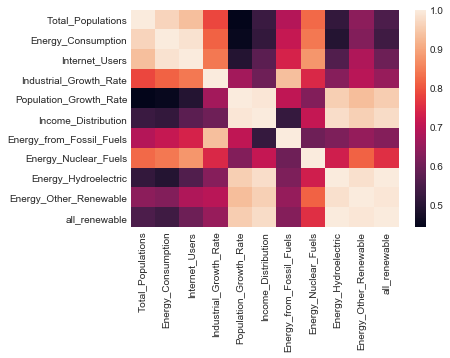

In [117]:
sns.heatmap(df.corr())

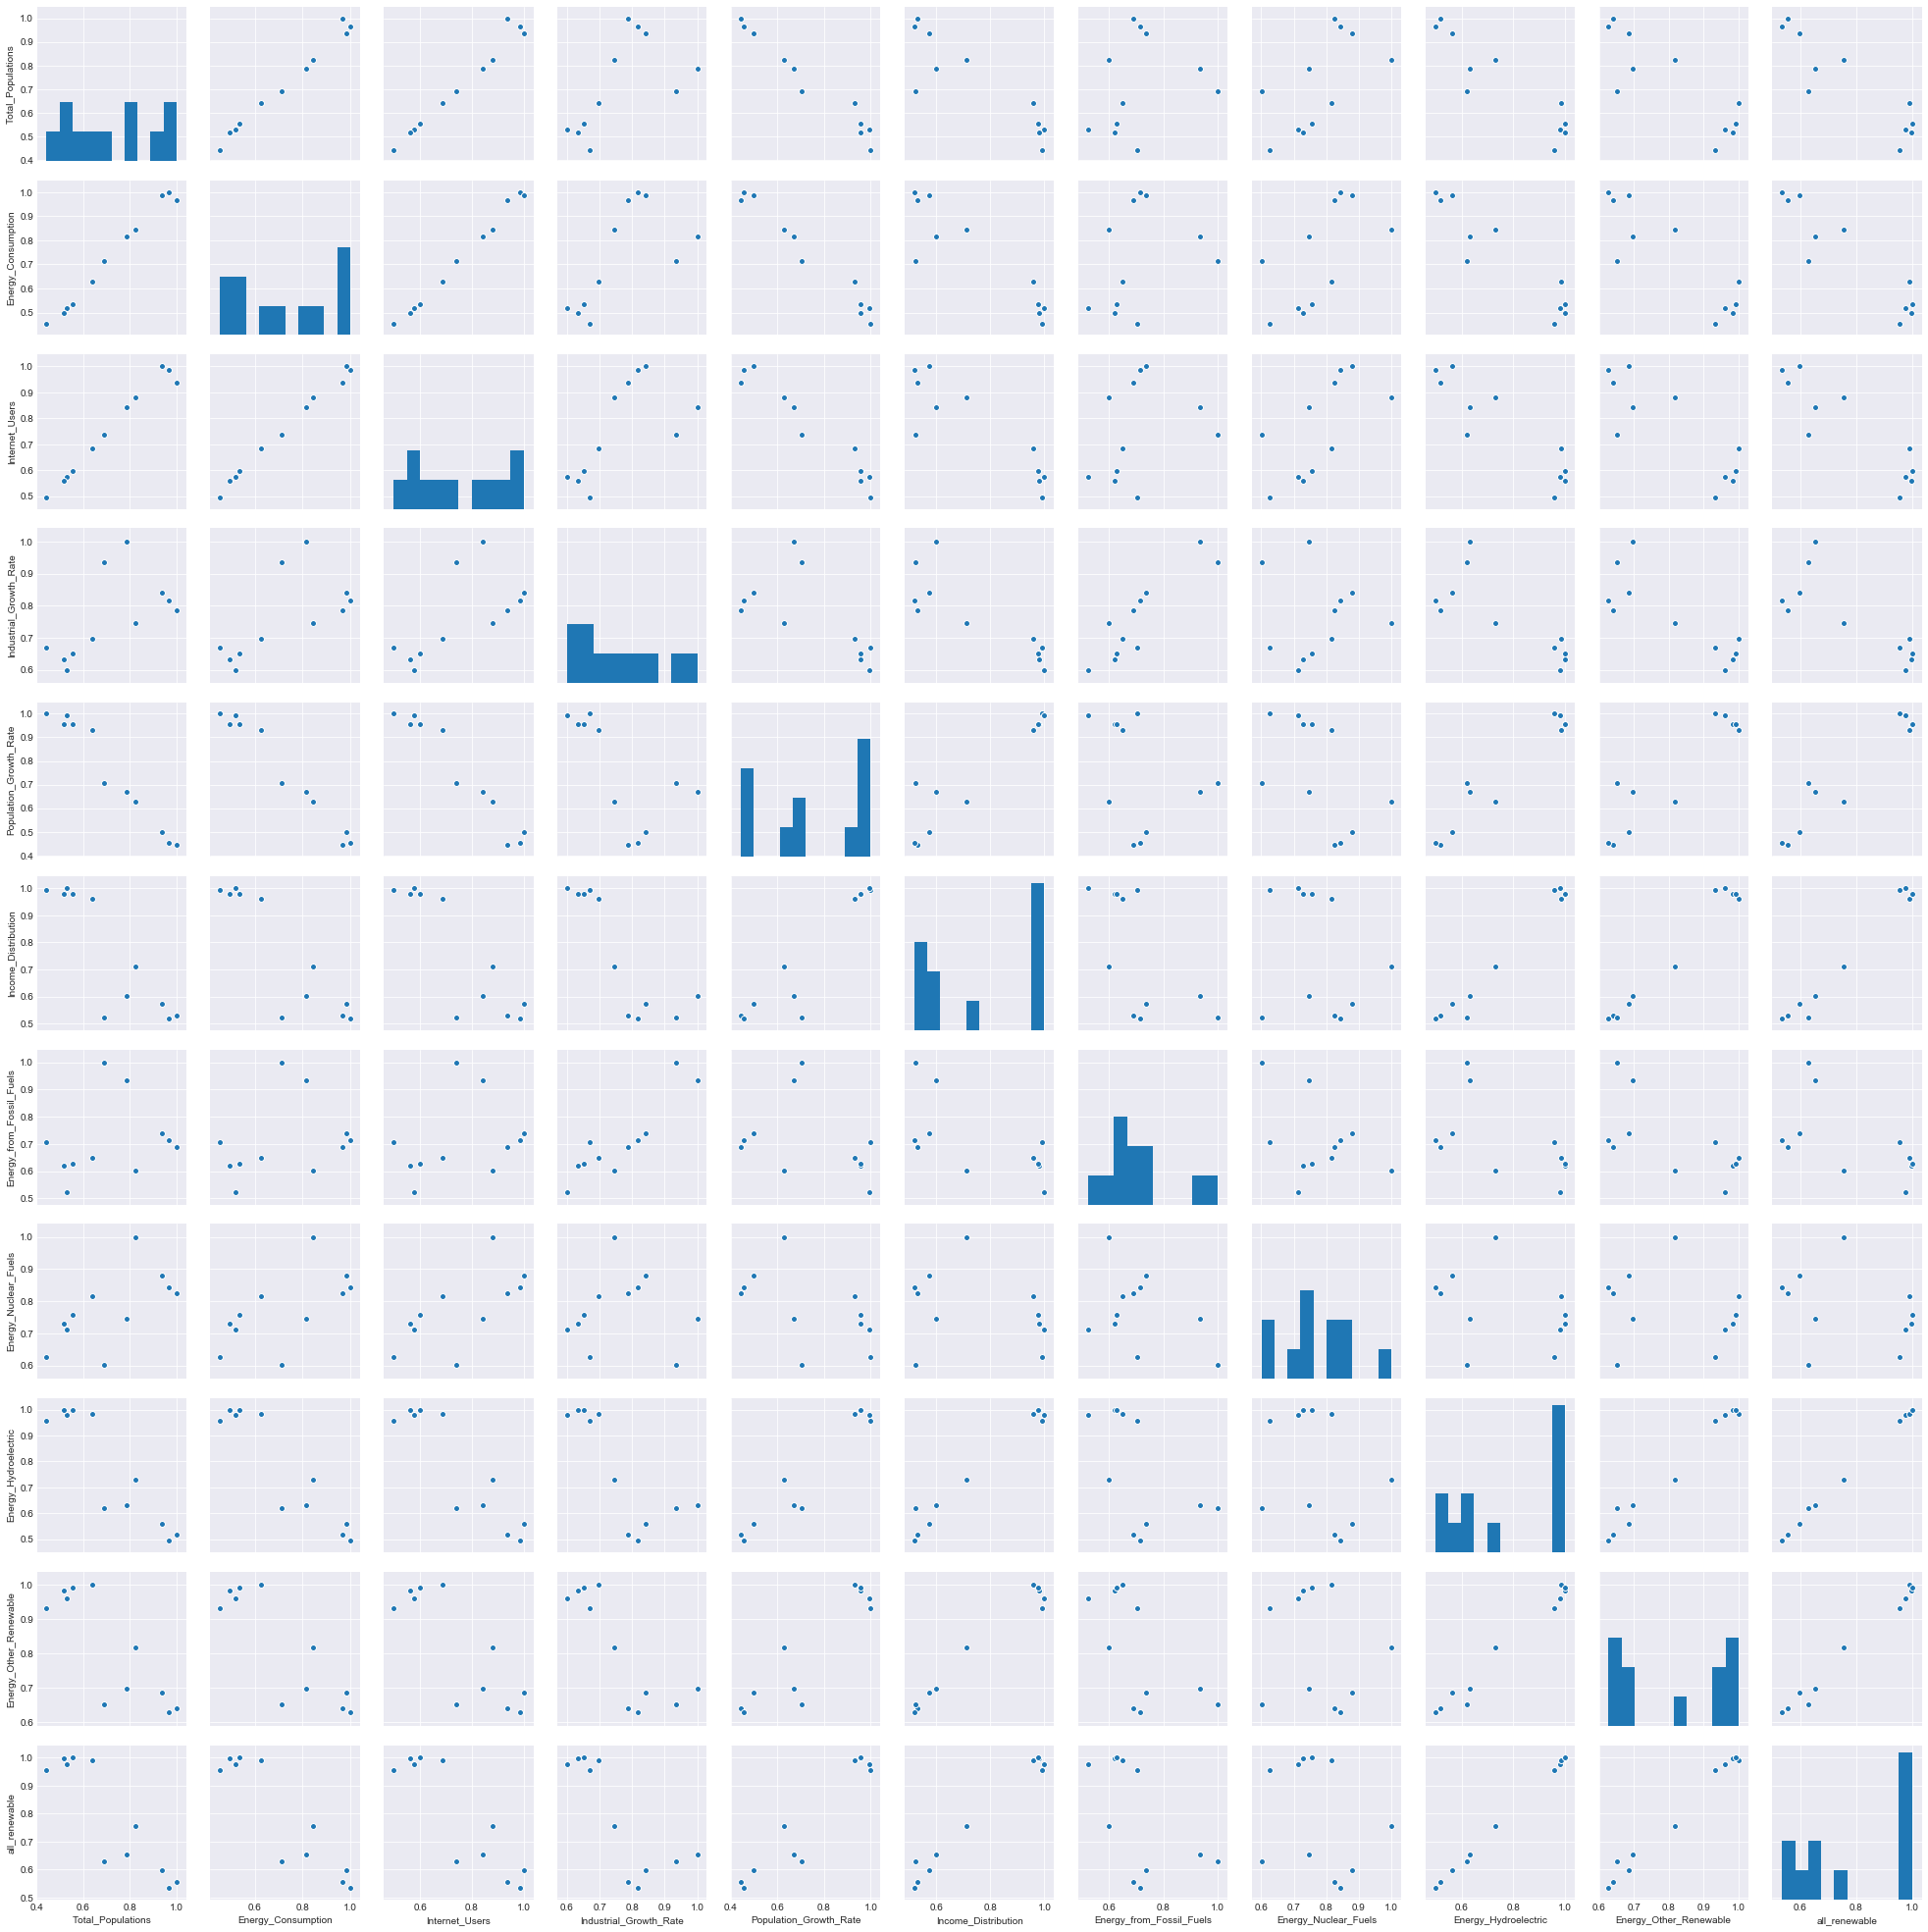

In [118]:
sns.pairplot(df.corr())

In [120]:
# Define the model
lm1 = smf.ols('all_renewable ~ Total_Populations + Energy_Consumption + \
Internet_Users + Industrial_Growth_Rate + \
Population_Growth_Rate + Income_Distribution + \
Energy_Nuclear_Fuels + Energy_from_Fossil_Fuels', data=df)

# Fit the model
fit = lm1.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          all_renewable   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5674.
Date:                Wed, 11 Jul 2018   Prob (F-statistic):          5.73e-179
Time:                        13:00:34   Log-Likelihood:                -345.99
No. Observations:                 156   AIC:                             710.0
Df Residuals:                     147   BIC:                             737.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.6504      3.628      0.455      0.650      -5.520       8.821
Total_Populations        -1.262e-08   5.59e-09     -2.255      0.026   -2.37e-08   -1.56e-09
Energy_Consumption       -1.848e-12   3.18e-12     -0.581      0.562   -8.14e-12    4.44e-12
Internet_Users           -8.198e-09   2.38e-08     -0.345      0.731   -5.52e-08    3.88e-08
Industrial_Growth_Rate       0.2318      0.593      0.391      0.696      -0.940       1.404
Population_Growth_Rate      63.3606      2.485     25.497      0.000      58.450      68.271
Income_Distribution         -1.3899      0.211     -6.585      0.000      -1.807      -0.973
Energy_Nuclear_Fuels         1.3058      0.146      8.929      0.000       1.017       1.595
Energy_from_Fossil_Fuels    -0.0759      0.054     -1.407      0.161      -0.182       0.031
==============================================================================
Omnibus:                        4.207   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.906
Skew:                           0.274   Prob(JB):                        0.142
Kurtosis:                       3.548   Cond. No.                     1.49e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""